In [1]:
import dimod
import neal
import numpy as np
import joblib
import sys
import matplotlib.pyplot as plt
import time

# Make potential by RBM

In [2]:
sys.path.append("../lib/")
from MoleculeRegressor import FP
from rbm_util import train_rbm

def run_rbm(start_smiles):
    fp_list,_=FP.calc_fingerprint(start_smiles)
    joblib.dump(fp_list,"data/fp.bin")

    batch_size=8

    if len(fp_list)<batch_size:
        batch_size=2
    batch_size

    all_dim=2000
    fp_dim=len(fp_list[0])

    while all_dim <= fp_dim:
        all_dim=all_dim*2

    print("RBM dimension:", all_dim)
    plt.figure()
    _=train_rbm(fp_path="data/fp.bin",
                        out_path="data/rbm_J.bin",
                        batch_size= batch_size,
                        all_units=all_dim,
                        use_gpu=True,
                        epochs = 300,
                        k=3,
                        check_reconstruction=3)


RDKit WARNING: [13:59:26] Enabling RDKit 2019.09.3 jupyter extensions


RBM dimension: 2000
RBM fitting: 1it [00:00,  1.82it/s]
Epoch:1 ,avg_cost = 0.5340166091918945 ,std_cost = nan ,avg_grad = 195922.59375 ,std_grad = nan
RBM fitting: 1it [00:00, 468.01it/s]
Epoch:2 ,avg_cost = 0.08402498066425323 ,std_cost = nan ,avg_grad = 61707.9375 ,std_grad = nan
RBM fitting: 1it [00:00, 497.31it/s]
Epoch:3 ,avg_cost = 0.056052275002002716 ,std_cost = nan ,avg_grad = 50173.5546875 ,std_grad = nan
RBM fitting: 1it [00:00, 485.90it/s]
Epoch:4 ,avg_cost = 0.06206180155277252 ,std_cost = nan ,avg_grad = 48364.37890625 ,std_grad = nan
RBM fitting: 1it [00:00, 511.06it/s]
Epoch:5 ,avg_cost = 0.05307365208864212 ,std_cost = nan ,avg_grad = 46067.984375 ,std_grad = nan
RBM fitting: 1it [00:00, 512.06it/s]
Epoch:6 ,avg_cost = 0.048294395208358765 ,std_cost = nan ,avg_grad = 42012.5234375 ,std_grad = nan
RBM fitting: 1it [00:00, 500.51it/s]
Epoch:7 ,avg_cost = 0.04486013203859329 ,std_cost = nan ,avg_grad = 40498.1171875 ,std_grad = nan
RBM fitting: 1it [00:00, 494.73it/s]
Ep

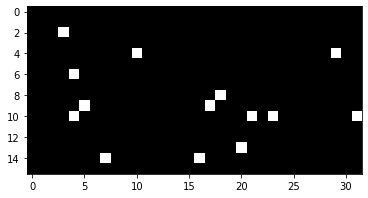

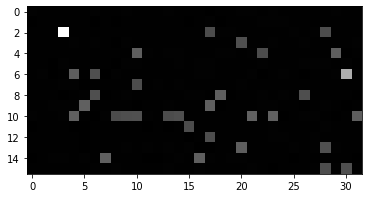

Original and reconstructed images


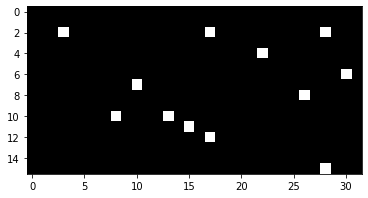

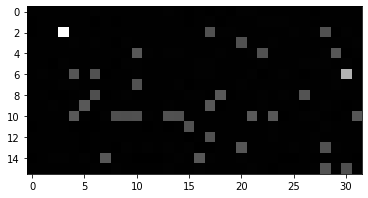

Original and reconstructed images


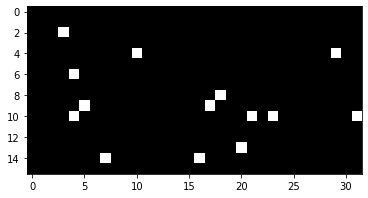

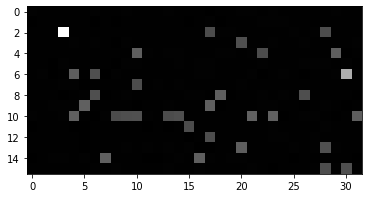

In [3]:
start_smiles=["Cc1ccccc1","FC(F)(F)F","O=C(O)C"]
run_rbm(start_smiles)

In [6]:
#set qubo
rbm_qubo=joblib.load("data/rbm_J.bin")
rbm_qubo=rbm_qubo#[:200,:200]
bqm = dimod.BQM.from_numpy_matrix(-rbm_qubo)

# Annealing
- digital annealing unit (DAU) is only available at private server
- toshiba SBM is available at amazon EC2

In [7]:
#simulated annealing by D-Wave api
solver = neal.SimulatedAnnealingSampler()
%time sim_response = solver.sample(bqm,num_reads=1)
sim_response

CPU times: user 26.7 s, sys: 4.4 s, total: 31.1 s
Wall time: 25.8 s


SampleSet(rec.array([([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [10]:
#quantum anneal
from dwave.system.samplers import DWaveSampler
from dwave.system import  LeapHybridSampler
from dwave.cloud import Client
from dwave.system.composites import EmbeddingComposite


token="your_token"
solver="DW_2000Q_6"

#hybrid solver
"""
client = Client.from_config(token=token)
print(client.get_solvers())
%time response = LeapHybridSampler(token=token,num_reads=1).sample(bqm)
"""

'\nclient = Client.from_config(token=token)\nprint(client.get_solvers())\n%time response = LeapHybridSampler(token=token,num_reads=1).sample(bqm)\n'